# Natural Language Processing - Bill Text Exploration


Transform the raw data into feature vectors and these new features will be created using the existing dataset. Structure as follows:

Data Exploration
- Word Cloud 

Vectorizers
- Custom and Spacy Tokenizer
- Count Vectors as features
- TF-IDF Vectors as features

- Word level
- N-Gram level

Character level
- Word Embeddings as features
- Text / NLP based features
- Topic Models as features

https://www.analyticsvidhya.com/blog/2018/04/a-comprehensive-guide-to-understand-and-implement-text-classification-in-python/

In [168]:
import mysql.connector 
import numpy as np
import pandas as pd
import config_final
import requests

from sodapy import Socrata
import sqlalchemy as db


In [169]:
def query(q):
    try:
        return pd.read_sql_query(q, engine)
    # Pass when no data is returned    
    except ResourceClosedError:
        pass

def query_list(col, table, distinct = True):
    elts = ['SELECT',
            'DISTINCT' if distinct else '',
            col,
            'FROM',
            table]
    query_str = ' '.join(elts)
    df = query(query_str)
    l = df.iloc[:,0].tolist()
    return l

In [170]:
engine = db.create_engine(f'mysql+mysqlconnector://{config_final.user}:{config_final.password}@{config_final.host}/con_bills')

connection = engine.connect()
metadata=db.MetaData()

In [171]:
df = query('SELECT BillID, Title, Summary, PassH, Cong FROM con_bills.current_bills')


In [ ]:
df.tail()

In [173]:
df['Summary'].isnull().sum()

21

In [174]:
df['PassH'].value_counts()

0    25165
1     1913
Name: PassH, dtype: int64

In [175]:
blanks = []

for i, billID, title, summary, PassH, Cong in df.itertuples():  # iterate over the DataFrame
    if type(summary)==str:            # avoid NaN values
        if summary.isspace():         # test 'plot' for whitespace
            blanks.append(i)
                  
len(blanks)

0

# Wordcloud Exploration

Initial exploration of topics in dependent variable using wordcloud and stopword engineering.

Pass House 0 = Bills did not pass House

Pass House 1 = Bill passed House


In [176]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
stopwords.add("concurrent")
stopwords.add("resolution")
stopwords.add("recognizing")
stopwords.add("providing")
stopwords.add("provide")
stopwords.add("bill")
stopwords.add("congressional")
stopwords.add("authorizing")
stopwords.add("authorize")
stopwords.add("designating")
stopwords.add("designate")
stopwords.add("printi")
stopwords.add("printing")
stopwords.add("printed")
stopwords.add("Congress")
stopwords.add("Authorizes")
stopwords.add("Provides")

In [177]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords, 
        max_words=50,
        max_font_size=40, 
        scale=3,
        random_state=1 
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()


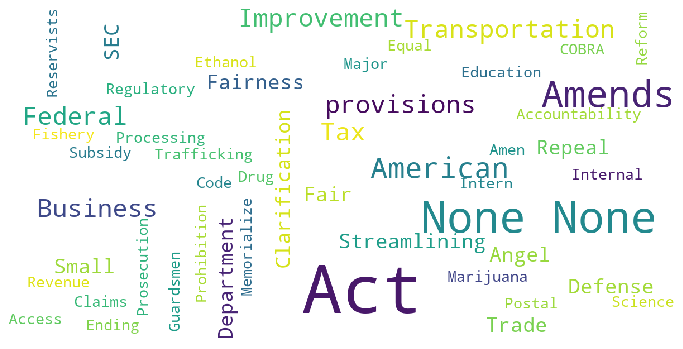

In [178]:
show_wordcloud(df[df['PassH']==0]['Summary'])

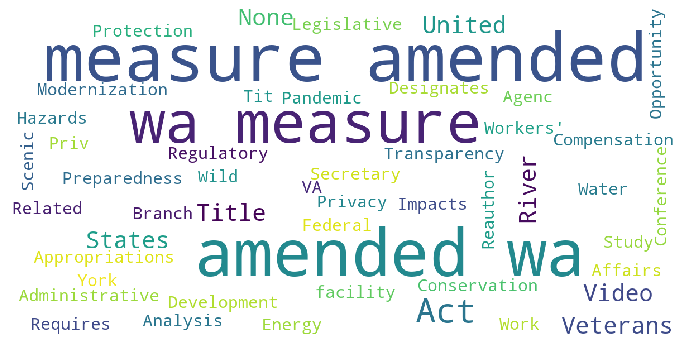

In [179]:
show_wordcloud(df[df['PassH']==1]['Summary'])

In [180]:
#Wordcloud on difference of frequencies

# Topic Modeling

**Split Training and Testing Data**

In [181]:
from sklearn import preprocessing

In [243]:
from sklearn.model_selection import train_test_split

X = df['Title']
y = df['PassH']

X_train, X_test, y_train1, y_test1 = train_test_split(X, y, )

In [244]:
X_test

8769     To amend the Internal Revenue Code of 1986 to ...
962      To establish the Honorable Stephanie Tubbs Jon...
15954    A bill to encourage investments in airports th...
8492     Making supplemental appropriations for the Nat...
22411    To provide for a land exchange involving certa...
18555    To require a review of university-based center...
23382    To amend title 28, United States Code, to proh...
19921    To amend the Internal Revenue Code of 1986 to ...
12884    To promote and protect from discrimination liv...
7008     A bill to amend the Internal Revenue Code of 1...
15522    A bill to amend the Internal Revenue Code of 1...
4712     A bill to require all public school employees ...
4635     A bill to set the United States on track to en...
25778    A bill to amend title 38, United States Code, ...
5464     A bill to create jobs by providing payroll tax...
5998     A bill to suspend temporarily the duty on spor...
18294    To amend the Elementary and Secondary Educatio.

In [245]:
df['PassH'].head()

0    0
1    0
2    0
3    0
4    0
Name: PassH, dtype: int64

Encode our target column so that it can be used in machine learning models (may not be necessary since the data is already binary)

In [246]:
encoder = preprocessing.LabelEncoder()

y_train = encoder.fit_transform(y_train1)
y_test = encoder.fit_transform(y_test1)

In [247]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

## Feature Engineering


**Cleaning Text**

Test both the spacy tokenizer and personalized tokenizer against the data.

In [248]:
import spacy
from spacy.lang.en import English
# For part of speech tagging
import en_core_web_sm

nlp = English()
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS

In [249]:
#Editing the stopwords list
# spacy_stopwords.add('concurrent', 'resolution')

In [250]:
#Lemmitization
for word in lem:
    print(word.text, word.lemma_)

NameError: name 'lem' is not defined

In [251]:
#Part of speech tagging
nlp_pos = en_core_web_sm.load()


In [252]:
#Define the spacy tokenizer
spacy_tokenizer = spacy.load('en_core_web_sm', disable =['tagger', 'parser', 'ner'])

In [253]:
import string
import re

replace_with_space = re.compile('[/(){}\[\]\|@,;]')

just_words = re.compile('[^a-zA-Z\s]')


In [254]:
from spacy.lemmatizer import Lemmatizer
from spacy.lookups import Lookups
lemmatizer = Lemmatizer(lookups)

In [255]:
# stopwords = set(STOPWORDS)

In [256]:
# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
nlp = spacy.load('en_core_web_sm')
stop_words = spacy.lang.en.stop_words.STOP_WORDS

def tokenizer(text):
    
    #lowercase everything
    lower_text = text.lower()
    
    #remove punctuation
#     no_pun_text = lower_text.translate(str.maketrans('', '', string.punctuation))
    
    #get rid of weird characters
    text = replace_with_space.sub('',lower_text)
    
    #remove numbers
    just_words_text = just_words.sub('', text)
    
    #add spacy tokenizer
    mytokens = nlp(just_words_text, disable=['parser', 'ner'])
#     print(mytokens)
    
    #for POS tagging
#     mytokens = [word for word in mytokens if (word.pos_ == 'NOUN') or (word.pos_ == 'VERB') or (word.pos_ == 'ADJ') or (word.pos_ == 'ADV')]
    
    #lemmatize
    mytokens = [word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    #add stopwords
    mytokens = [word for word in mytokens if word not in spacy_stopwords and word not in punctuations]
    
    return mytokens
    

In [257]:
test_fun = df.iloc[5559][2]
test_fun

'Online Pharmacy Safety Act - Amends the the Federal Food, Drug, and Cosmetic Act to permit the dispensing of drugs only pursuant to a "valid prescription" and requires such a prescription to include at least one in-person medical evaluation of the patient by a licensed health care practitioner.'

In [258]:
tokenizer(test_fun)


['online',
 'pharmacy',
 'safety',
 'act',
 'amend',
 'federal',
 'food',
 'drug',
 'cosmetic',
 'act',
 'permit',
 'dispensing',
 'drug',
 'pursuant',
 'valid',
 'prescription',
 'require',
 'prescription',
 'include',
 'inperson',
 'medical',
 'evaluation',
 'patient',
 'licensed',
 'health',
 'care',
 'practitioner']

**Saving to DF**

In [259]:
# df['clean_summaries'] = df.apply(lambda row: clean(row['Summary']), axis=1)

In [260]:
df['tokenized_summaries'] = df.apply(lambda row: tokenizer(row['Summary']), axis=1)


AttributeError: ("'NoneType' object has no attribute 'lower'", 'occurred at index 0')

In [261]:
df.head()

,BillID,Title,Summary,PassH,Cong
0,112-HR-1007,To amend the Homeland Security Act of 2002 to ...,None,0,112
1,112-HR-1105,To ensure that Transportation Worker Identific...,None,0,112
2,112-HR-1143,"To amend title 46, United States Code, to requ...",None,0,112
3,112-HR-1165,"To amend title 49, United States Code, to esta...",None,0,112
4,112-HR-1279,"To amend title 49, United States Code, to esta...",None,0,112


**CountVectorizer**

Every row represents a document in the corpus, every column represents a term in the document, every cell represents the frequency count of a particular term in a particular document.

Tuning: analyzer, vectorizer, max_features, max_df, min_df, n_grams

In [262]:
#decide if i want to use these

# params = {'vect__max_df': (0.5, 0.75, 1.0),
#         'vect__max_features': (None, 5000, 10000, 50000),
#         'vect__ngram_range': ((1, 1), (1, 2))
#          }

In [263]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(tokenizer = tokenizer)
transformed = vectorizer.fit_transform(X_train, y_train)
print(len(vectorizer.get_feature_names()))

11114


In [264]:
X_train.head()

5171     A bill to make minor modifications to the proc...
16821    A bill to exempt the Federal Aviation Administ...
19777    To amend title 5, United States Code, to limit...
10164    To encourage States to prohibit """"""""""""""...
10005       To improve hydropower, and for other purposes.
Name: Title, dtype: object

In [265]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [266]:
# fit and transform training data

# dtm_train_cv = cv.fit_transform(X_train)
# dtm_test_cv = cv.transform(X_test)

**Exploring Stored Words**

In [267]:
print(vectorizer.get_feature_names())

['aa', 'aaron', 'aatetrahydroisobenzofurandione', 'ab', 'abandon', 'abandonment', 'abate', 'abatement', 'abbott', 'abdoul', 'abduct', 'abducted', 'abduction', 'abe', 'abet', 'abide', 'abie', 'ability', 'abisphenol', 'abjuration', 'able', 'ablebodie', 'ablebodied', 'abner', 'aboard', 'abolish', 'abolishment', 'abolition', 'aboriginal', 'abortion', 'abortionrelated', 'abovetheline', 'abraham', 'abridge', 'abroad', 'abrogate', 'abrogation', 'absence', 'absent', 'absentee', 'abstinence', 'abstinenceonly', 'abundant', 'abuse', 'abused', 'abusedeterrent', 'abuser', 'abusive', 'abut', 'ac', 'aca', 'academia', 'academic', 'academically', 'academy', 'acadia', 'acaexpansion', 'accelerate', 'accelerated', 'acceleration', 'accelerator', 'accept', 'acceptable', 'acceptance', 'acceptor', 'access', 'accessibility', 'accessible', 'accession', 'accessory', 'accident', 'accidental', 'accidentally', 'accomack', 'accommodate', 'accommodation', 'accompany', 'accomplish', 'accomplishment', 'accord', 'accord

In [268]:
len(vectorizer.get_feature_names())

11114

In [269]:
import random

#get ten random words from each

for i in range(10):
    word_id = random.randint(0, 9959) #second should be len of cv
    print(vectorizer.get_feature_names()[word_id])

bra
formulate
nationality
nonregulatory
cartridge
preeminent
plymouth
sling
sediment
antidoping


**Topic - Modeling LDA**


LDA is an iterative model which starts from a fixed number of topics. Each topic is represented as a distribution over words, and each document is then represented as a distribution over topics.

In [270]:
from sklearn.decomposition import LatentDirichletAllocation

In [271]:
# Build LDA Model
#focus on number topics, max iteration, learning decay
lda_model = LatentDirichletAllocation(n_components=15,               # Number of topics
                                      max_iter=20,  
                                      learning_decay=0.5,    # Max learning iterations (how many times going over whole dataset)
#                                       learning_method='online',   #constantly update with new data or batch
                                      random_state=42,          # Random state
                                      batch_size=128,            # n docs in each learning iter
                                      evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                      n_jobs = -1,               # Use all available CPUs
                                     )

print(lda_model)  # Model attributes

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.5,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=20,
                          mean_change_tol=0.001, n_components=15, n_jobs=-1,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)


In [272]:
# This can take awhile, we're dealing with a large amount of documents!

lda_output = lda_model.fit_transform(transformed)


**OPTIONAL - Grisearch LDA**

In [222]:
from sklearn.model_selection import GridSearchCV


# Define Search Param
search_params = {'n_components': [15, 20, 25],'learning_decay': [.5, .7]}

# Init the Model
lda = LatentDirichletAllocation(max_iter=25)

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params, cv=3, verbose=2, n_jobs = -1)

# Do the Grid Search
model.fit(transformed)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed: 11.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=LatentDirichletAllocation(batch_size=128,
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1,
                                                 learning_decay=0.7,
                                                 learning_method='batch',
                                                 learning_offset=10.0,
                                                 max_doc_update_iter=100,
                                                 max_iter=25,
                                                 mean_change_tol=0.001,
                                                 n_components=10, n_jobs=None,
                                                 perp_tol=0.1,
                                                 random_state=None,
                                                 topic_word_prior=None,
                                                 total_s

In [224]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(transformed))

#Shows best params
#shows best log likelihood
#shows model perplexity score

Best Model's Params:  {'learning_decay': 0.5, 'n_components': 15}
Best Log Likelihood Score:  -751642.0137549518
Model Perplexity:  921.196053929341


**Model evaluation:**

In [275]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_model.score(transformed))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(transformed))

# See model parameters
print(lda_model.get_params())

Log Likelihood:  -2023593.7189975688
Perplexity:  918.4023644801994
{'batch_size': 128, 'doc_topic_prior': None, 'evaluate_every': -1, 'learning_decay': 0.5, 'learning_method': 'batch', 'learning_offset': 10.0, 'max_doc_update_iter': 100, 'max_iter': 20, 'mean_change_tol': 0.001, 'n_components': 15, 'n_jobs': -1, 'perp_tol': 0.1, 'random_state': 42, 'topic_word_prior': None, 'total_samples': 1000000.0, 'verbose': 0}


Look at model components:

In [276]:
lda_model.components_

array([[0.06666667, 0.06666678, 0.06666667, ..., 0.06666676, 0.06666667,
        0.06666667],
       [0.06666667, 0.06666667, 0.06666667, ..., 0.06666667, 0.06666667,
        0.06666667],
       [0.06666667, 0.06666667, 0.06666667, ..., 0.06666667, 0.06666667,
        0.06666667],
       ...,
       [2.06666651, 0.06666667, 0.06666667, ..., 0.06666667, 0.06666667,
        0.06666667],
       [0.06666677, 0.06666667, 0.06666667, ..., 0.06666667, 0.06666667,
        0.06666667],
       [0.06666667, 0.06666667, 0.06666767, ..., 0.06666726, 1.06666667,
        0.06666667]])

In [277]:
single_topic = lda_model.components_[0]

In [278]:
# Returns the indices that would sort this array.
single_topic.argsort()

#look at the most and least representative words!

array([ 398, 7915, 6077, ..., 5537, 1049, 8200])

In [279]:
# Word least representative of this topic
single_topic[248]

#first round goes from 0.05 to 106.1

0.06666697114562413

In [280]:
# Word most representative of this topic
single_topic[8108]

0.06666666666671682

Look at the top fifteen for each topic:

In [281]:
for index,topic in enumerate(lda_model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

#print top fifteen words for each topic
#increase number of topics to get more specific topics
#go back and clean some of the data based on answers

THE TOP 15 WORDS FOR TOPIC #0
['right', 'protect', 'respect', 'workforce', 'strengthen', 'provide', 'improve', 'employment', 'opportunity', 'job', 'economic', 'promote', 'labor', 'bill', 'purpose']


THE TOP 15 WORDS FOR TOPIC #1
['qualified', 'account', 'allow', 'extend', 'certain', 'purpose', 'provide', 'income', 'bill', 'credit', 'tax', 'amend', 'code', 'internal', 'revenue']


THE TOP 15 WORDS FOR TOPIC #2
['state', 'heritage', 'specie', 'reduction', 'modify', 'park', 'area', 'establish', 'purpose', 'bill', 'duty', 'suspension', 'national', 'temporary', 'extend']


THE TOP 15 WORDS FOR TOPIC #3
['pay', 'fiscal', 'rate', 'increase', 'disaster', 'emergency', 'federal', 'debt', 'amend', 'year', 'provide', 'budget', 'purpose', 'act', 'bill']


THE TOP 15 WORDS FOR TOPIC #4
['appropriation', 'defense', 'bill', 'affairs', 'facility', 'designate', 'states', 'united', 'purpose', 'service', 'secretary', 'affair', 'veteran', 'veterans', 'department']


THE TOP 15 WORDS FOR TOPIC #5
['safe', 

In [282]:
# Create Document - Topic Matrix
lda_output = lda_model.transform(transformed)

# column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)] #change to best_lda_model after gridsearch!

# index names
docnames = ["Doc" + str(i) for i in range(len(X_train))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

#final column shows the topic each document is most 'like'
#topcis are distribution of words, and see which scores most highly on, and applying that topic to the document

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13,Topic14,dominant_topic
Doc0,0.01,0.01,0.01,0.01,0.16,0.58,0.01,0.01,0.01,0.16,0.01,0.01,0.01,0.01,0.01,5
Doc1,0.01,0.01,0.01,0.44,0.01,0.01,0.01,0.01,0.01,0.01,0.45,0.01,0.01,0.01,0.01,10
Doc2,0.07,0,0,0.44,0,0,0,0,0,0,0,0,0,0.34,0.1,3
Doc3,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.84,0.01,0.01,0.01,0.01,0.01,0.01,0.01,7
Doc4,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.77,0.02,13
Doc5,0.2,0,0.52,0,0,0,0,0,0,0,0.23,0,0,0,0,2
Doc6,0.16,0,0.2,0,0,0,0,0.55,0,0,0,0,0,0,0.06,7
Doc7,0,0,0,0,0.78,0,0,0,0.19,0,0,0,0,0,0,4
Doc8,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.9,0.01,0.01,0.01,0.01,10
Doc9,0,0,0.22,0,0.17,0,0.55,0,0,0,0,0,0,0,0,6


In [283]:
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

,Topic Num,Num Documents
0,11,2356
1,10,2280
2,1,1695
3,13,1616
4,9,1454
5,5,1358
6,14,1342
7,12,1266
8,8,1266
9,7,1078


**Dominant topic visualizations**



In [285]:
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

/Users/melissamunz/anaconda3/lib/python3.7/site-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable


In [287]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(best_lda_model, transformed, vectorizer, mds='tsne')
panel

AssertionError: Topic-term distributions and document-term matrix have different number of columns, 11021 != 11114.

**Data Mapper Pipeline**


This allow each column to be mapped to different encoders.

https://pypi.org/project/dataframe-mapper/

In [27]:
!pip install dataframe-mapper

Should do this for title and summary separately:

In [ ]:
column_tuples = [
    ('Sales', None),
    ('ShelveLoc', LabelEncoder()),
    ('Urban', LabelEncoder()), 
    ('US', LabelEncoder())]

mapper = DataFrameMapper(column_tuples, default=StandardScaler())
mapper_fit = mapper.fit(train)